<center><img src=img/MScAI_brand.png width=70%></center>

# Numpy: Multidimensional Arrays and Fancy Indexing


### Multidimensional arrays


A 2-dimensional array is like a matrix in maths. We can again make a 2-dimensional array in several ways, e.g. using functions like `np.ones`:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
M = np.ones((3, 3))
print(M)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


Here, we must pass in the *shape* (not just the length). The shape is a tuple of integers.

By the way, we can write `M` on its own in IPython or Jupyter Notebook, and we'll see the output:

In [3]:
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

But writing `print(M)` gives a slightly nicer output:

In [4]:
print(M)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


We can also pass in a list of lists to make a two-dimensional array composed of the elements of those lists:

In [5]:
X = [[1.0, 2.0], 
     [3.0, 4.0]] # just a list of lists
X = np.array(X)
print(X)

[[1. 2.]
 [3. 4.]]


Again, we can do operations on each element:

In [6]:
X + 10

array([[11., 12.],
       [13., 14.]])

Of course, `X` has not been altered by this:

In [7]:
X

array([[1., 2.],
       [3., 4.]])

We can find out the shape of an array:

In [8]:
X.shape

(2, 2)

### Fancy Indexing

When we studied lists, they were always one-dimensional: 
```python
L = [4, 5, 6]
```
It requires just one integer to index `L`. 

(Ok, we can make *lists of lists*, but by the substitution model we only deal with one dimension at a time: `L = [[4, 5, 6], [7, 8, 9]]`, so `L[0] == [4, 5, 6]`, and `L[0][0] == 4`.) 

We also saw list *slices*.

As we have seen, we can use indexing and slicing on 1D Numpy arrays, just like with lists. But for multidimensional arrays, we access elements using not a single number but a `tuple`.

```
Operation | Python list | Numpy array
----------|-------------|------------
Index     | L[int]      | a[tuple]
Shape     | len(L)      | a.shape
```

This reflects the move from a single number (length of a list) to a `tuple` (*shape* of an array). We can combine indexing and slicing in that tuple arbitrarily. That is called *fancy indexing*.

In [9]:
print(X)
X[0, 1] # equivalent to X[(0, 1)]

[[1. 2.]
 [3. 4.]]


2.0

In [10]:
# the comma is the tuple constructor!
t = 1, 2
type(t)

tuple

We can also extract a single row:

In [11]:
X[0, :]

array([1., 2.])

Here `0` means "the first row" and `:` means "all columns" -- like writing `[:]` to mean "all elements" in a list slice, which we saw when studying lists. So we get all elements of the first row.

We get a single column in a similar way, and notice that it now "looks like a row".

In [12]:
X[:, 0]

array([1., 3.])

As the logical conclusion of this, we'll see expressions such as `X[:, :]`. You'll say wait, that's not a `tuple`! But it is -- `:, :` is a `tuple` of two slices, where each slice `:` omits both start and end values, so they take on default values.

In [13]:
print(X[:, :])

[[1. 2.]
 [3. 4.]]


In [14]:
print(X[0:X.shape[0], 0:X.shape[1]])

[[1. 2.]
 [3. 4.]]


### Reshaping

If we have, say an array of 10 numbers, we can ask for it to be reshaped as 5$\times$2 or 2$\times$5. The numbers aren't changed -- it's just the *shape* of the table they are presented in:

In [15]:
X = np.array(range(10))
print(X)

[0 1 2 3 4 5 6 7 8 9]


In [16]:
print(X.reshape((5, 2)))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [17]:
print(X.reshape((2, 5)))

[[0 1 2 3 4]
 [5 6 7 8 9]]


In [18]:
print(X.reshape((10, 1)))

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [19]:
print(X.reshape((1, 10)))

[[0 1 2 3 4 5 6 7 8 9]]


In [20]:
print(X.reshape((10,))) # a tuple of one element: (10,)

[0 1 2 3 4 5 6 7 8 9]


Notice that `X` itself has not been altered:

In [21]:
print(X)

[0 1 2 3 4 5 6 7 8 9]


A related idea is transposing, done using `.T`:

In [22]:
X = np.array([[1.0,  2.0,   3.0], 
              [4.0,  5.0,   6.0]])
print(X)
print("") # put a blank line for clarity
print(X.T)

[[1. 2. 3.]
 [4. 5. 6.]]

[[1. 4.]
 [2. 5.]
 [3. 6.]]


### Image data

A 2D array can be used to represent a greyscale image. 

Photo by <a href="https://unsplash.com/@corneliusventures?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Cornelius Ventures</a> on <a href="https://unsplash.com/photos/Ak81Vc-kCf4?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

(313, 300)


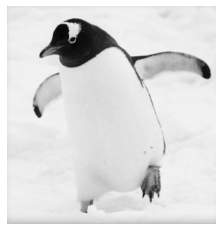

In [23]:
x = np.load("data/penguin_grey.npy")
print(x.shape)
plt.imshow(x, cmap="gray")
plt.axis("off");

Usually we either have `int`s in `[0, 255]`, or `float`s in `[0, 1]`.

In [24]:
x[:4, :4]

array([[134, 136, 137, 139],
       [136, 137, 139, 140],
       [138, 139, 141, 142],
       [139, 141, 143, 144]], dtype=uint8)

And of course colour images have 3 channels (red, green, and blue) or 4 (red, green, blue, and alpha, which means opacity).

(313, 300, 3)


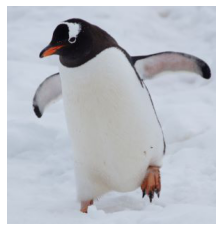

In [25]:
x = plt.imread("img/penguin.jpg")
print(x.shape)
plt.imshow(x)
plt.axis("off");

### Other 2D datasets

Many machine learning tasks involve a 2D dataset, eg:

* In **clustering**, we have a dataset $X$ is of shape $n \times m$ where $n$ is the number of examples and $m$ the number of features.

* In **classification**, we have $(X, y)$ where $y$ is a binary label, and $X$ is as above.

We'll see these later in the module.

### Higher-dimensional arrays

So far we have seen 1D and 2D and 3D arrays, and they are the most common. However, higher dimensions can also occur in applications.

For example, a dataset of 1000 images might have shape `(1000, 100, 100, 3)`.

### A note on `dtype`s

* Above we saw that image data had `dtype=uint8`. That is an `unsigned int` with 8 bits. `unsigned` means the range is `[0, 255]`. 
* There is also `dtype=int8`, where the range will be `[-127, 127]`
* Other Numpy `dtype`s include `float32` and `float64`. The latter has more range and more accuracy.
* If we know how much range and accuracy we need, we can tell Numpy when constructing the `array`, and save memory.

In [28]:
x = np.array([-129, -128, -127, -1, 0, 1, 127, 128, 129], dtype='int8')

In [29]:
x

array([ 127, -128, -127,   -1,    0,    1,  127, -128, -127], dtype=int8)